### CONNECT TO DRIVE FOLDER ANND MAP TO CO LAB

In [1]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Navigate to the right Folder  

In [2]:
%cd '/content/gdrive/MyDrive/personal_project01'

/content/gdrive/MyDrive/personal_project01


#### Check if you are in the right folder


In [3]:
!ls

data  logs  model  PersonalProjectipynb


# Start Here

In [4]:
import tensorflow as tf
import os

## <font color='green'> OC </font> allow you to see the dirctory files


In [5]:
os.listdir('data')

['Hand', 'Machine']

##<font color='green'>The code bellow: </font> make sure you won't use all your gpu and get the Out of Memory error!


In [6]:
# avoid OOM  by setting the GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#gpus = tf.config.experimental.list_physical_devices('CPU')
#gpus



## <font color='green'> Download Dependancy : </font> cv and imagehdr TO REMOVE ANY DOGGY IMAGES



In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
# access a variable to hold data
data_dir = 'data'

In [9]:
#check DATA file if it has our files
os.listdir(data_dir)

['Hand', 'Machine']

In [10]:
# create an list of images extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

## <font color='yellow'> #To navigate and check the folder </font> To check the images inside the *folders*!

#if i want to check the picture in my happy folder example

##:<font color= 'blue'> os.listdir(os.path.join(data_dir, 'happy')) </font>

## To check for sad folder in data directory

## <font color='blue'> os.listdir(os.path.join(data_dir, 'sad')) </font>


In [11]:
#if i want to check the picture in my happy folder example
#os.listdir(os.path.join(data_dir, 'happy'))


## <font color='yellow'> loop inside every picture : </font> go inside our directory and print happy and sad files


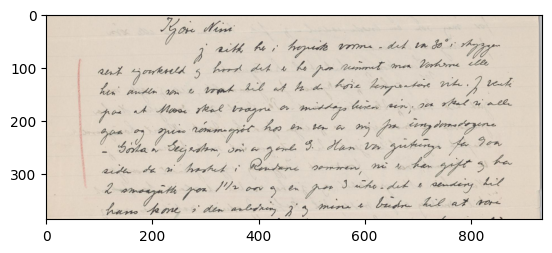

In [13]:
              ###. Dont run this cell just for learning sake! ####

# This line will convert the pic to an array and let you open any image in the directory
img= cv2.imread(os.path.join('data','Hand', 'img1.png'))

#TO SEE THE IMG SHAPE
img.shape

#TO SHOW THE IMAGE (COLOR WILL LOOK OFF BECAUSE CV READ RBG ONLY)
plt.imshow(img)

# TO FIX THAT YOU CAN DO WILL FIX THE COLOR THIS IS WHERE from matplotlib import pyplot as plt COMES HANDY
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

#TO GET READ OF THAT WEIRD LINES COMES AT THE TOP OF THE IMAGE (TO SEE THE LINE DELETE THE CODE BELOW)
plt.show()

In [14]:
# to access the file (ahppy, sad) in data dir
for image_class in os.listdir(data_dir):
# to go through every image in image_class(happy,sad) folders
  for image in os.listdir(os.path.join(data_dir, image_class)):
    #to go to specific image in every class in everyfolder in data_dir
      image_path = os.path.join(data_dir, image_class, image)
      try:
        # check if its not a valid image
        img = cv2.imread(image_path)
        # check if its not a valid extention
        tip = imghdr.what(image_path)
        # if it is the get rid of it
        if tip not in image_exts:
          print(f'Image not exist in list {image_path}')
          # this will allow you to delete a file
          os.remove(image_path)
      except Exception as e:
        print(f'Issue with image {image_path}')

Image not exist in list data/Hand/.DS_Store
Image not exist in list data/Hand/depositphotos_122395788-stock-photo-hand-written-letter-seamless-text.jpg
Image not exist in list data/Hand/thumbnail_411126311.svg
Image not exist in list data/Hand/seamless-handwritten-text-260nw-28825682.jpg
Image not exist in list data/Hand/Figure-1-Sample-Page-1.jpg
Image not exist in list data/Hand/unreadable-love-themed-letter-hand-written-writing-in-cursive-pen-2125179680.jpg
Image not exist in list data/Hand/train.jpg
Image not exist in list data/Hand/eping-handwriting-with-crossed-out-words-vector-illustration-of-a-2107570106.jpg
Image not exist in list data/Hand/n-ink-written-text-old-manuscript-letter-with-vintage-handwriting-1910128066.jpg
Image not exist in list data/Hand/handwritten-abstract-text-wallpaper-imitation-260nw-1549481003.jpg
Image not exist in list data/Hand/.DS_Store (1)
Image not exist in list data/Machine/paragraph2.webp
Image not exist in list data/Machine/.DS_Store
Image not ex


## <font color ='red'> Load Data </font>





In [15]:
# to start a pipline and create your own data
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

## <font color ='red'>

In [16]:
#import numpy and plt(previosly did it above)
import numpy as np
from matplotlib import pyplot as plt

# - The code below will help you to lable the picture, class,natch_size=32, img_size to (256,256) shufle them and more pretty much set them up

In [17]:
#load data build an image data set on the fly which you dont need to buld
#any img class or resize and punch of other pre process most importently it set all the image to the same size
# you can change any of the size or batch by just addeding to the code below:
# data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 8 or 16 , image_size = (128,128))..etc

data = tf.keras.utils.image_dataset_from_directory('data')

Found 443 files belonging to 2 classes.


In [23]:
# this code will pretty much iterate through all the doc and pull them as it goes and loop through the data
data_iterator = data.as_numpy_iterator()

In [24]:
# pull the image Get batch from the iterator
batch = data_iterator.next()


In [25]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [26]:
#class 1 = Machine
# class 0 = Hand
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

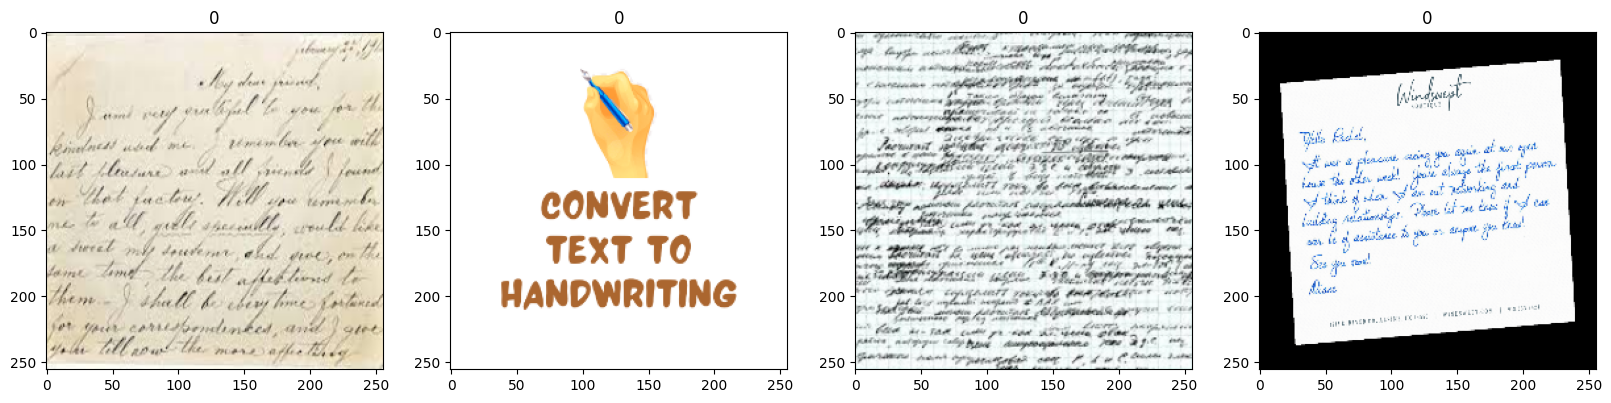

In [27]:
# using matloplib to show the pic we set it for 4 pic at the time
fig, ax = plt.subplots(ncols =4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

##      #2.Processing Data


In [31]:
# scaled our data to mkae it run much faster because its between 0-1 rather than 0-255 so we devided it by 255 Play with the code to see should be set 0|1 0 for min 1 max
scaled = batch[0] / 255
scaled.max() #this should print 1.0
scaled.min() # should print 0.0

0.0

## 2.1 Scale Data: useful website is https://www.tensorflow.org/guide/data

In [32]:
# to apply scaling on our pipline which is the effective way to do scaling
data = data.map(lambda x,y: (x/255,y))

In [33]:
#give us access to data and allow us to grab the next batch
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

In [36]:
batch[0].min() #try max should give you 1.0 result

1.0

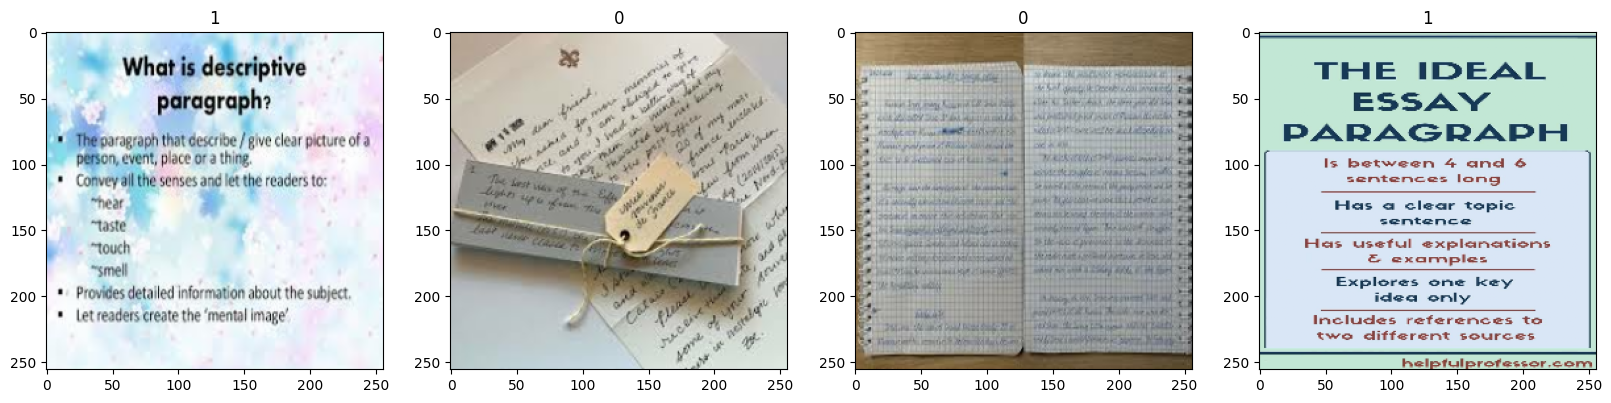

In [37]:
# using matloplib to show the pic we set it for 4 pic at the time
# notice if we run the same code above the resut will be black image reason why because we assign img.astype(int) but we forgot that we devided by 255 so will give zero
# to fix the issue we just need to change the value of img.astype(int) to just imshow(img) instead and wolaa workes! ;)
fig, ax = plt.subplots(ncols =4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [38]:
# check our data we see that we have 14 batches each one has 32 picture for the most part
len(data)

14

## The code below will do the following:
1- train_size : will train our data what it used to train our model

2- val_size :  will evaluate our data while we training

3- test_size: this will come in handy at the end

1&2 will use during training while 3 after training

In [46]:
# set our training set to 70% of the Data
train_size = int(len(data)*.7) # will set 9 batches to training
# set our validation to 20% of the Data
val_size = int(len(data)*.2)+2 # will be 4 batch which is a problem to fix we just add 1
# set our test to 10% of the Data
test_size =int(len(data)*.1)   # will be 1 so to fix it we just add 1 to get all 7 baches

In [51]:
# so now we sum all of them to make sure we get all the batches data

train_size + test_size + val_size # sum equal 14 means we are good to go ;)
# To check the other set just run the name to see the length of it

14

## Establish you train and val & test data


In [57]:
# check the tf website above to learn more about take and skip
# also if the data is not shuffle make sure to shuffle it before you do this.
# so this code will assign how the data will be treated

#train will take the training batch thats why we used take
train = data.take(train_size)
# val will skip first the data that been trained and take the val_size
val = data.skip(train_size).take(val_size)
# test will skip the train data and the val and deal with the rest
test = data.skip(train_size + val_size).take(test_size)

In [58]:
len(train) #should print 9
len(val)  # should print 4
len(test) #should print 1

1

## 3.Deep Model

## 3.1 Build Deep learning Model

In [60]:
# import the sequential api
from tensorflow.keras.models import Sequential
# bring layers conv nural network 2D, maxpooling go through to your img and condince it
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #no need for Dropout

In [63]:
model = Sequential()

In [64]:
#adding convelutional layer and MaxPooling layer
# it has 16 filters and scan over an image and try to extrac the relevent information to make an out size 3*3 pixle and move 1 pixle
# activation: we are applying 'relu' which convert any negative value to zero # google relue activation
# input_shape this how we want our input to look like 256*256 pixle and moving 3 pixle
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
# flatten condance the width and length
model.add(Flatten())
# to get only one out put
model.add(Dense(256, activation='relu'))
# sigmoid will give us 0-1 which is Hand or Machine written text
model.add(Dense(1, activation= 'sigmoid'))


In [65]:
# compile the model we are using adam there as tons if other once you can just use tf.optimizers.   and will show you the list of them
# losses for the binary
# we need to track the accuracy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [68]:
# check the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

## 3.2 Train

In [69]:
#create a folder abd access it 'logs'
logdir ='logs'

In [70]:
# to check how yor model peroform
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
#fit our model fit is training our data , epochs= how many time the model will train, validation to check the validation of our data and then call back
# here we are training the data and see the results
# fit: training componant
# training: which will take our training data which is 9 batches 32imgs each
# epoches = how many time we will train the model
#validation = after we train the batches so we run the validation to see how the training goes
#hist = history to so how each traingand the changes on accuracy and loss (ideally: you want the loss to go down and the accuracy goes up! )
hist = model.fit(train, epochs= 20, validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 26s 2s/step - loss: 0.9656 - accuracy: 0.5382 - val_loss: 0.6978 - val_accuracy: 0.4219
Epoch 2/20
9/9 [==============================] - 23s 2s/step - loss: 0.7006 - accuracy: 0.5104 - val_loss: 0.6836 - val_accuracy: 0.6250
Epoch 3/20
9/9 [==============================] - 25s 3s/step - loss: 0.6881 - accuracy: 0.5486 - val_loss: 0.6678 - val_accuracy: 0.6562
Epoch 4/20
9/9 [==============================] - 28s 3s/step - loss: 0.6708 - accuracy: 0.5938 - val_loss: 0.6864 - val_accuracy: 0.5547
Epoch 5/20
9/9 [==============================] - 25s 3s/step - loss: 0.6500 - accuracy: 0.6007 - val_loss: 0.6280 - val_accuracy: 0.5547
Epoch 6/20
9/9 [==============================] - 28s 3s/step - loss: 0.5855 - accuracy: 0.6944 - val_loss: 0.6058 - val_accuracy: 0.7031
Epoch 7/20
9/9 [==============================] - 28s 3s/step - loss: 0.5441 - accuracy: 0.7361 - val_loss: 0.5292 - val_accuracy: 0.8047
Epoch 8/20
9/9 [==================

In [72]:
# to check the training history
hist.history


{'loss': [0.9656268358230591,
  0.7005951404571533,
  0.6880872249603271,
  0.670844316482544,
  0.6500332355499268,
  0.5854767560958862,
  0.5440700054168701,
  0.5105757117271423,
  0.46807432174682617,
  0.47303199768066406,
  0.40970006585121155,
  0.3277934789657593,
  0.35177966952323914,
  0.2716796100139618,
  0.3280600309371948,
  0.32011109590530396,
  0.23440681397914886,
  0.2282530516386032,
  0.23216216266155243,
  0.1941865086555481],
 'accuracy': [0.5381944179534912,
  0.5104166865348816,
  0.5486111044883728,
  0.59375,
  0.6006944179534912,
  0.6944444179534912,
  0.7361111044883728,
  0.7534722089767456,
  0.8159722089767456,
  0.8229166865348816,
  0.875,
  0.875,
  0.8645833134651184,
  0.8958333134651184,
  0.8784722089767456,
  0.8715277910232544,
  0.9236111044883728,
  0.9131944179534912,
  0.9131944179534912,
  0.9270833134651184],
 'val_loss': [0.6978247165679932,
  0.6835907697677612,
  0.6678076982498169,
  0.6863824725151062,
  0.6280467510223389,
  0.605

## 3.3 Plot Performance

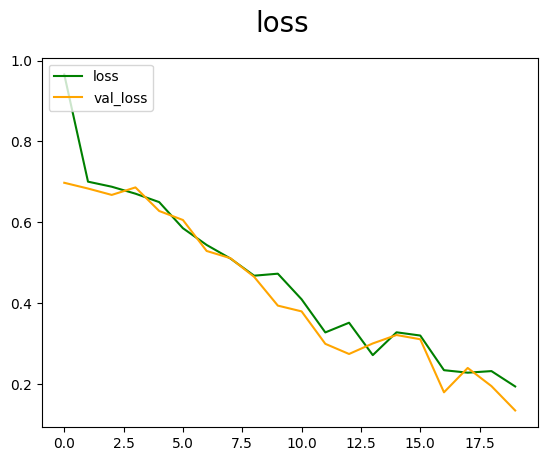

In [73]:
# create a plot figure if the va_loss go up means you have over fitting
fig = plt.figure()
plt.plot(hist.history['loss'], color ='green', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label ='val_loss')
fig,plt.suptitle('loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

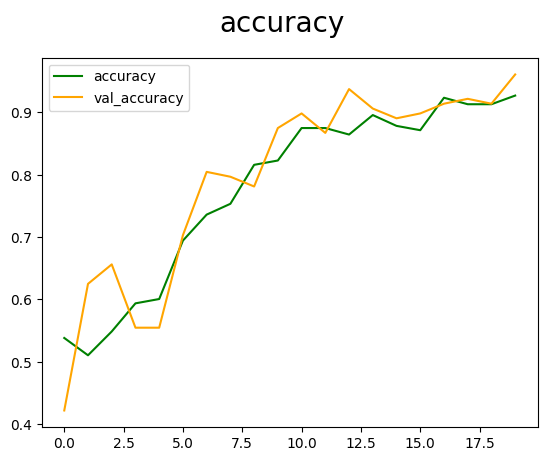

In [74]:
# now we do the same to our accuracy our model perform really well it gives 100%

fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label ='val_accuracy')
fig,plt.suptitle('accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluation Performance


## 4.1 Evaluate

In [75]:
# in order to evaluate the model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [76]:
# establish instances to be able to use them
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [77]:
# remember that we have only 1 batch to our test data you can check it by running this code: len(test)
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [78]:
#print out the results
print(f'precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

precision:0.9090909361839294, Recall: 0.8333333134651184, Accuracy: 0.8888888955116272


## 4.2 Test


In [97]:
import cv2

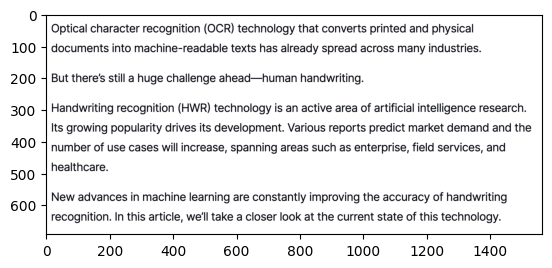

In [102]:
# we trying to test an imaage the model have not seen before so we go ahead and save a random sad or happy picture form google
img = cv2.imread('machin_test.jpeg')
#plt.imshow(img) this will make the picture look blueish to fix that:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

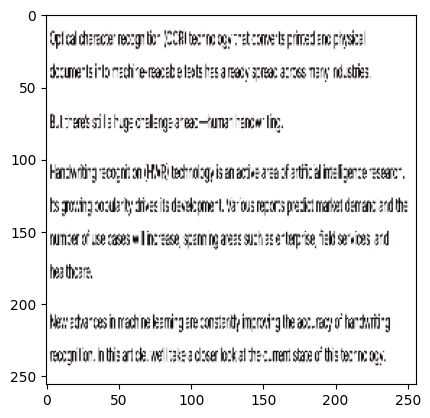

In [103]:
# TO RESIZE OUR IMAGE TO (256,256)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
# here we change the size to (256,256)

In [104]:
#scale it
yhat = model.predict(np.expand_dims(resize/255 ,0))

1/1 [==============================] - 0s 49ms/step


In [105]:
yhat # if you see the model predict that its 0.947 which is close to 1 which mean happy remember up 1: happy 0:sad

array([[0.99984926]], dtype=float32)

In [106]:
# here we sit an if statment to print the result
if yhat > 0.5:
  print(f'Predicted class is Machine_written')
else:
  print(f'Predicted class is Hand_written')

Predicted class is Machine_written


#5.0 Save The Model

In [107]:
# to load all the dependancy from tensorflow
from tensorflow.keras.models import load_model

In [113]:
# saving the model and serialization (taking a model and serialization like zip it)
model.save(os.path.join('model', 'hand_machine_written.h5'))

In [114]:
# we can now reload the model
new_model = load_model(os.path.join('model', 'hand_machine_written.h5'))

In [115]:
#show the model
new_model

In [116]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 102ms/step


In [117]:
# here we sit an if statment to print the result
if yhat_new > 0.5:
  print(f'Predicted class is Machine_written')
else:
  print(f'Predicted class is Hand_written')

Predicted class is Machine_written


## <font color = 'green'> DONNNNEEEEEEEEEEEE HOOOOOORRAAAAAY </font>  ✅